In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df_feat = pd.read_csv("raw_features.csv",index_col=0,parse_dates=True)
returns = pd.read_csv("raw_response.csv",index_col=0,parse_dates=True)
df_feat.dropna(inplace=True)

In [3]:
df_feat.head()

3M_Rate  10Y_2Y_Curve  5y5y_Forward  Core_PCE    NFP  UnEmp  \
1978-02-01     6.45      0.468333      8.234444  0.003835  354.0    6.3   
1978-03-01     6.29      0.460909      8.214091  0.005407  512.0    6.3   
1978-04-01     6.29      0.410500      8.325500  0.006489  702.0    6.1   
1978-05-01     6.41      0.339524      8.515714  0.005866  347.0    6.0   
1978-06-01     6.73      0.222727      8.569545  0.005601  441.0    5.9   

            Hstarts        IP   ISM  Mich_Sent  Mich_Inf       CPI  
1978-02-01   1738.0  0.004951  55.9       84.3       6.4  0.004754  
1978-03-01   2032.0  0.019062  55.0       78.8       6.3  0.006309  
1978-04-01   2197.0  0.020717  57.7       81.6       6.7  0.007837  
1978-05-01   2075.0  0.003709  60.2       82.9       6.9  0.006221  
1978-06-01   2070.0  0.006890  60.5       80.0       6.5  0.007728

In [4]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_feat.dropna()),columns=df_feat.columns,index=df_feat.index)

In [5]:
X_scaled

3M_Rate  10Y_2Y_Curve  5y5y_Forward  Core_PCE       NFP  \
1978-02-01  0.555637     -0.499796      0.532721  0.765086  1.063039   
1978-03-01  0.511437     -0.507789      0.526084  1.597774  1.826509   
1978-04-01  0.511437     -0.562055      0.562413  2.170618  2.744605   
1978-05-01  0.544587     -0.638463      0.624438  1.840855  1.029215   
1978-06-01  0.632987     -0.764198      0.641992  1.700411  1.483431   
...              ...           ...           ...       ...       ...   
2019-08-01 -0.687490     -0.944761     -1.576554 -0.560618  0.352723   
2019-09-01 -0.704065     -0.948528     -1.554350 -0.991771  0.357555   
2019-10-01 -0.770365     -0.836619     -1.536535 -0.594997  0.246417   
2019-11-01 -0.800753     -0.789231     -1.505198 -0.978102  0.613656   
2019-12-01 -0.800753     -0.735350     -1.486091 -0.030214  0.241585   

               UnEmp   Hstarts        IP       ISM  Mich_Sent  Mich_Inf  \
1978-02-01  0.068706  0.916719  0.499056  0.664469  -0.159568  1.693653   
1978-03-01  0.068706  1.656980  2.611369  0.509303  -0.594790  1.633996   
1978-04-01 -0.052767  2.072433  2.859206  0.974801  -0.373223  1.872626   
1978-05-01 -0.113504  1.765250  0.313266  1.405818  -0.270352  1.991940   
1978-06-01 -0.174241  1.752660  0.789335  1.457540  -0.499833  1.753311   
...              ...       ...       ...       ...        ...       ...   
2019-08-01 -1.510448  0.007759  0.813394 -0.559620   0.275654 -0.513670   
2019-09-01 -1.631921 -0.251584 -0.762260 -0.663064   0.544700 -0.454013   
2019-10-01 -1.571184 -0.085403 -0.851178 -0.611342   0.726702 -0.632985   
2019-11-01 -1.631921 -0.007348  1.147180 -0.680304   0.829573 -0.632985   
2019-12-01 -1.631921  0.536517 -0.767237 -0.732026   1.027401 -0.752300   

                 CPI  
1978-02-01  0.807151  
1978-03-01  1.471704  
1978-04-01  2.124739  
1978-05-01  1.433959  
1978-06-01  2.078143  
...              ...  
2019-08-01 -0.263383  
2019-09-01 -0.412773  
2019-10-01 -0.732440  
2019-11-01 -0.395890  
2019-12-01 -0.692102  

[503 rows x 12 columns]

In [6]:
#build Z-score function to normalize current change to custom historical period
def z_score(x):
    x = np.array(x)
    z = (x[-1] - x.mean())/x.std()
    return z

In [7]:
df2 = X_scaled.rolling(36).apply(z_score)

In [8]:
df3 = df2.dropna().copy()
df3 = df3-df3.shift(1)

In [9]:
df_all = X_scaled.join(df2,rsuffix='_36mZ').dropna()
df_all = df_all.join(df3,rsuffix='_changeZ').dropna()

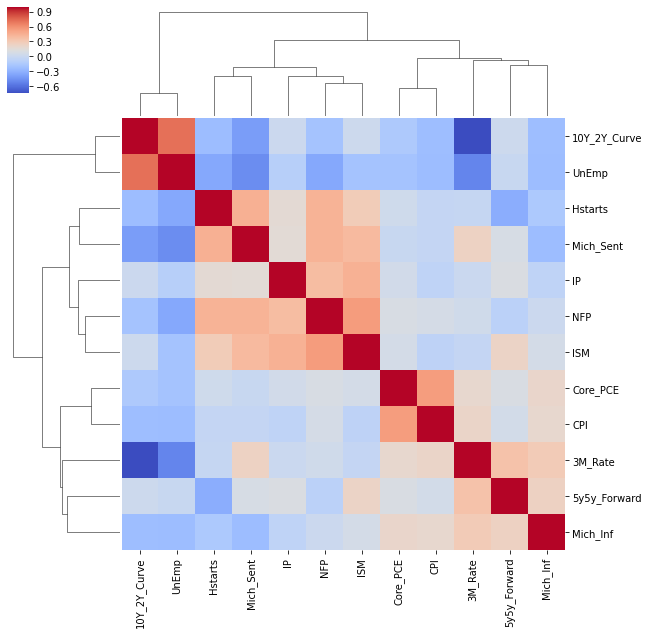

In [12]:
sns.clustermap(df2.dropna().corr(),cmap='coolwarm')

In [16]:
df_all.shape

(467, 36)

In [26]:
returns = returns[df_all.index[0]:]

In [27]:
df_feat_train = df_all.loc[:'2005',:]
df_feat_test = df_all.loc['2006':,:]

returns_train = returns.loc[:'2005',:]
returns_test = returns.loc['2006':,:]

In [31]:
df_feat_train.to_csv('processed_features_train.csv')
df_feat_test.to_csv('processed_features_test.csv')

returns_train.to_csv('processed_returns_train.csv')
returns_test.to_csv('processed_returns_test.csv')